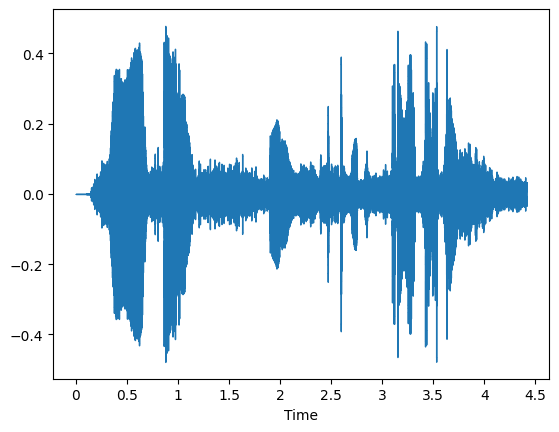

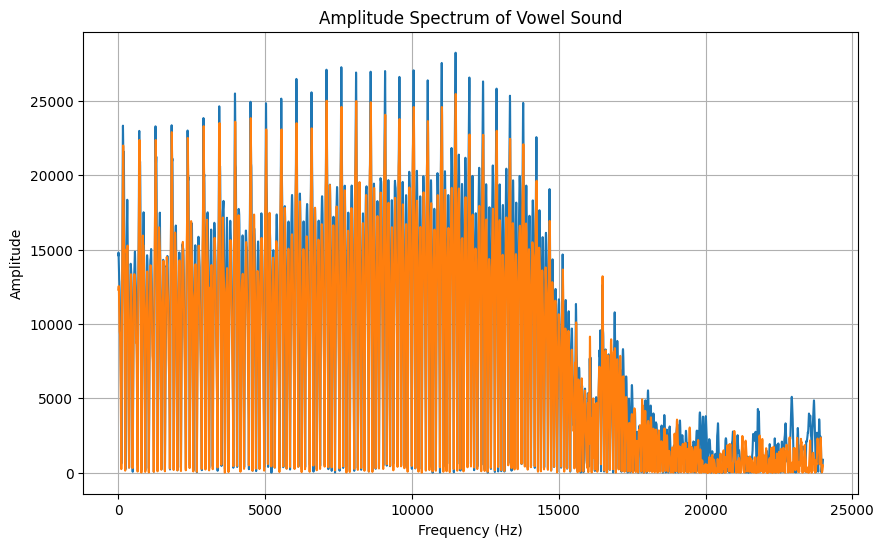

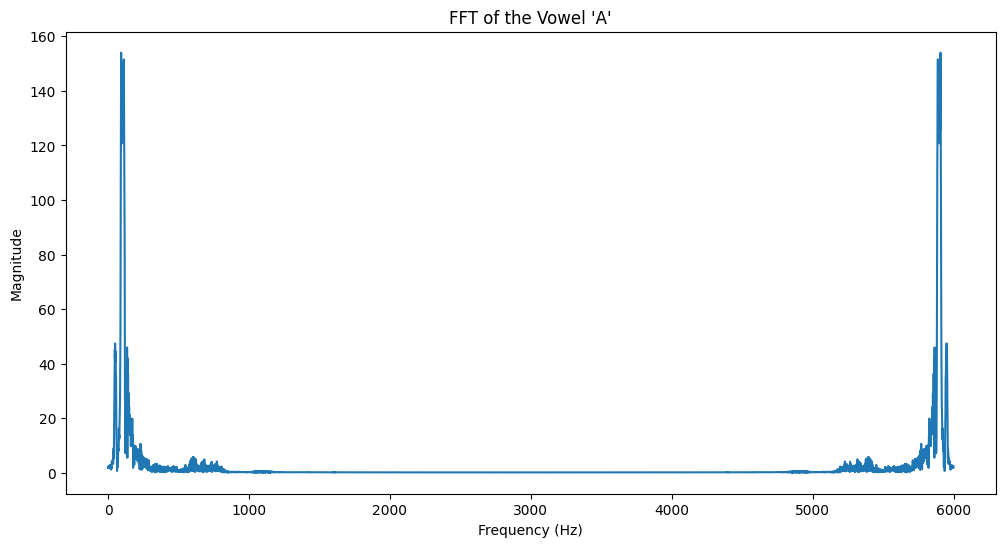

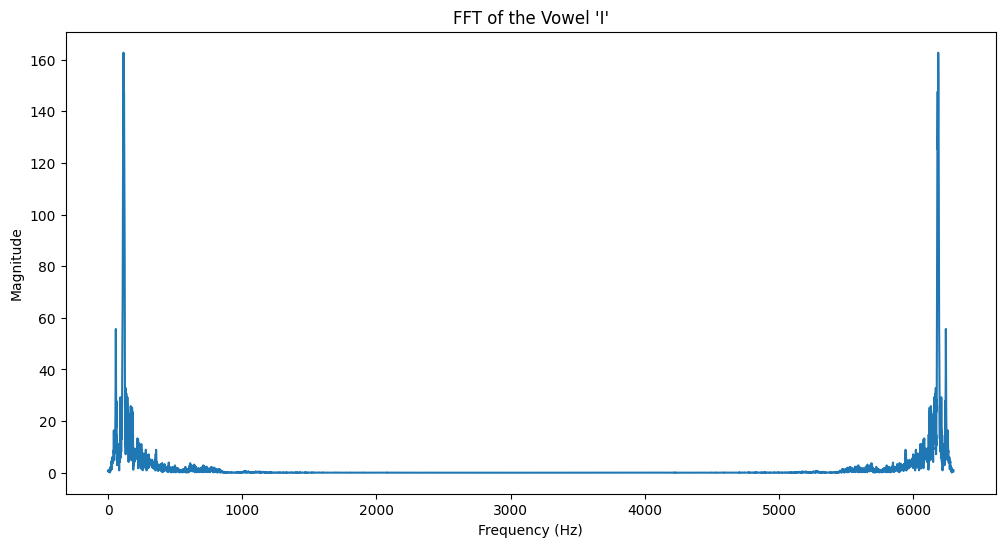

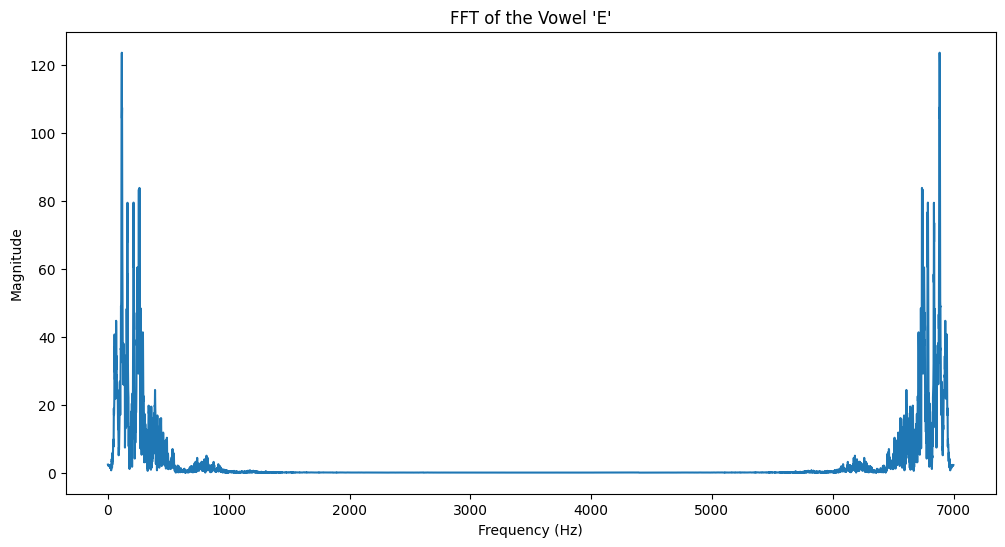

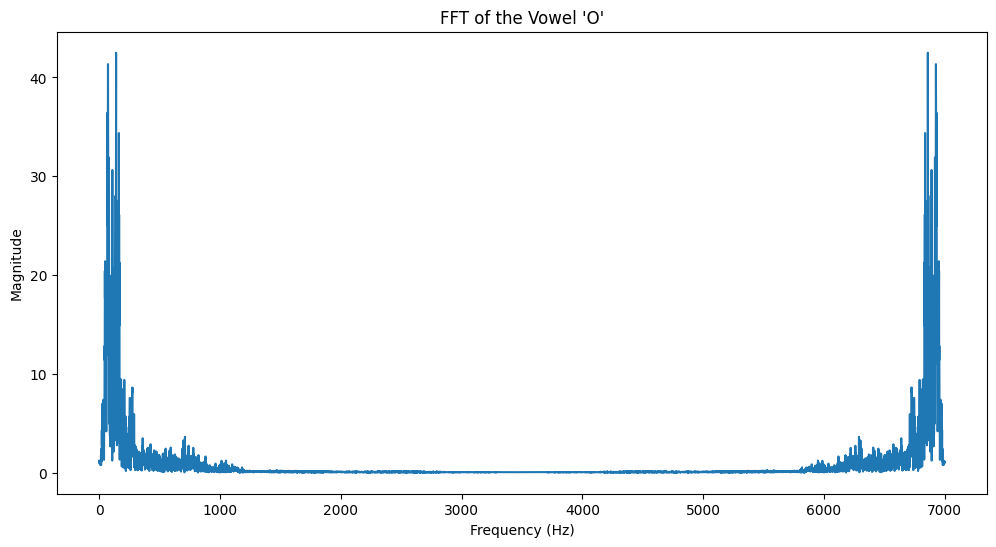

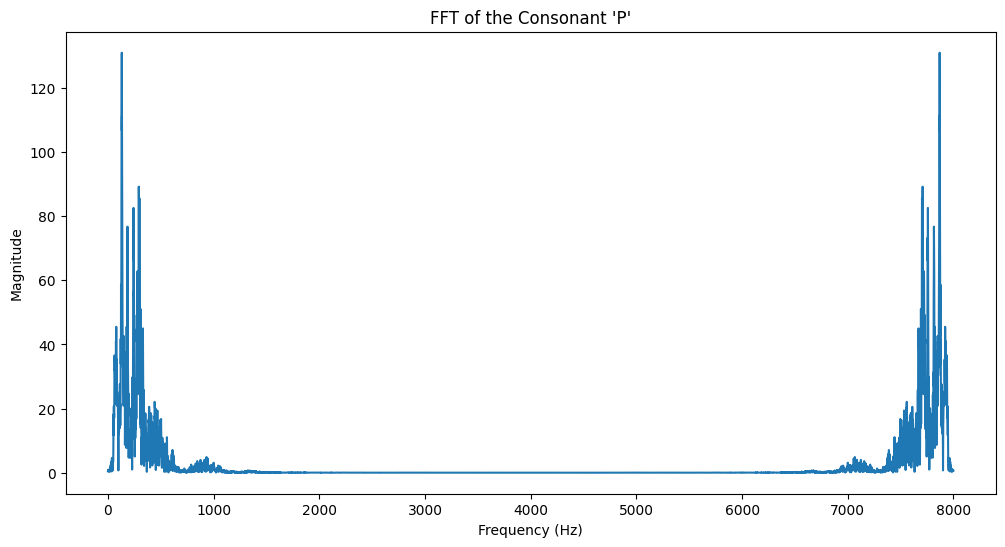

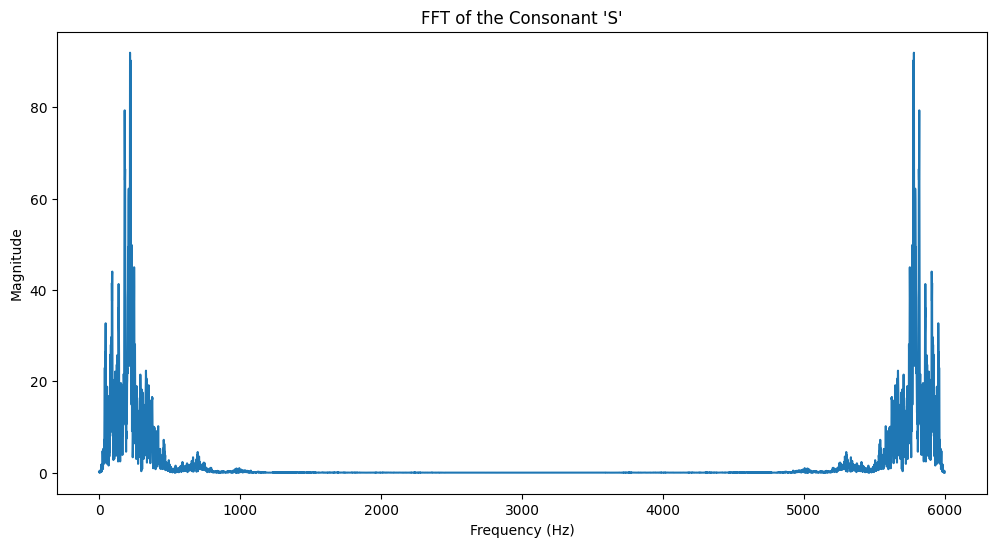

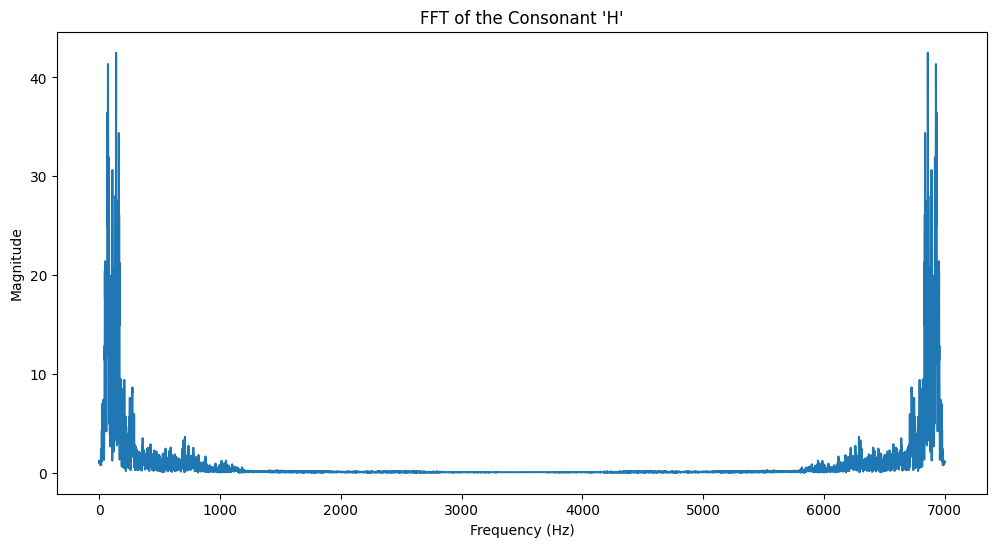

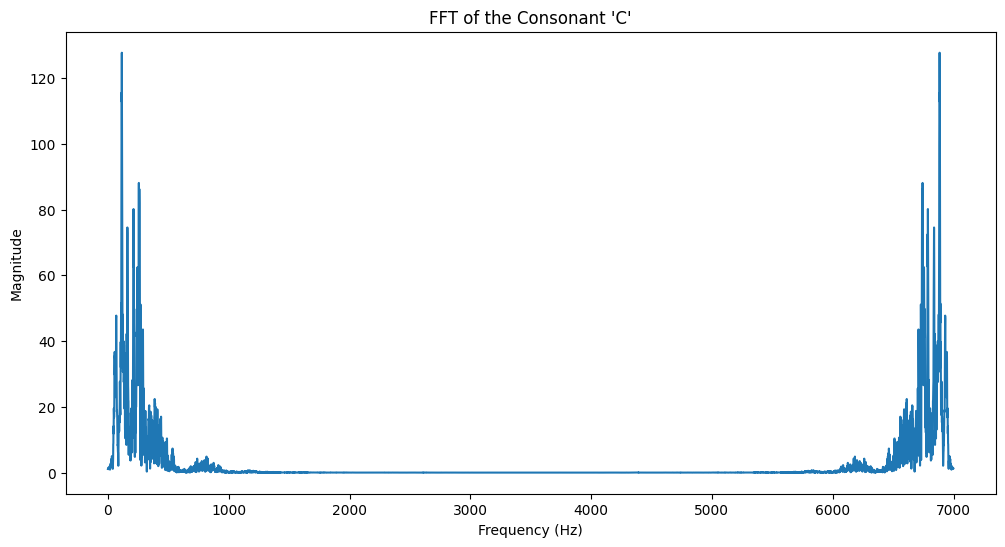

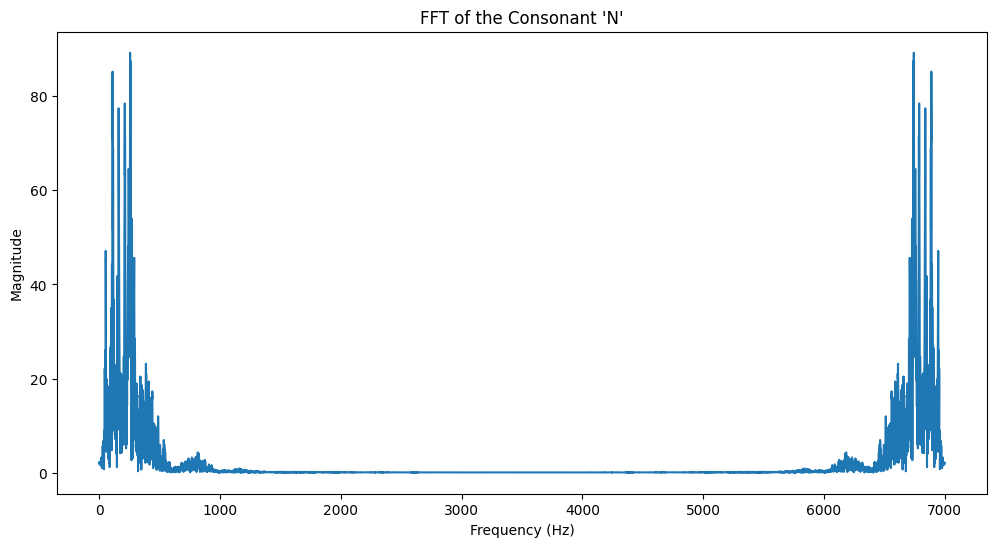

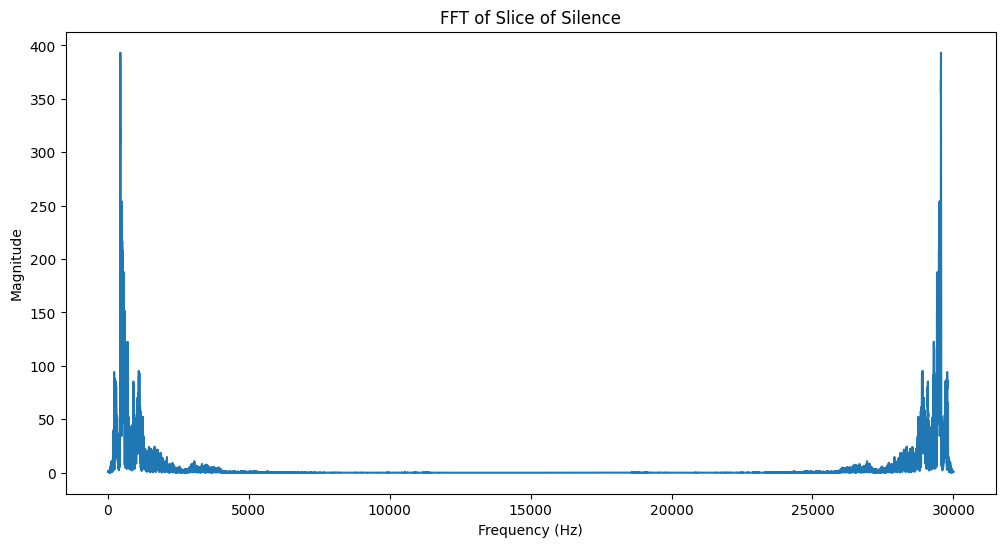

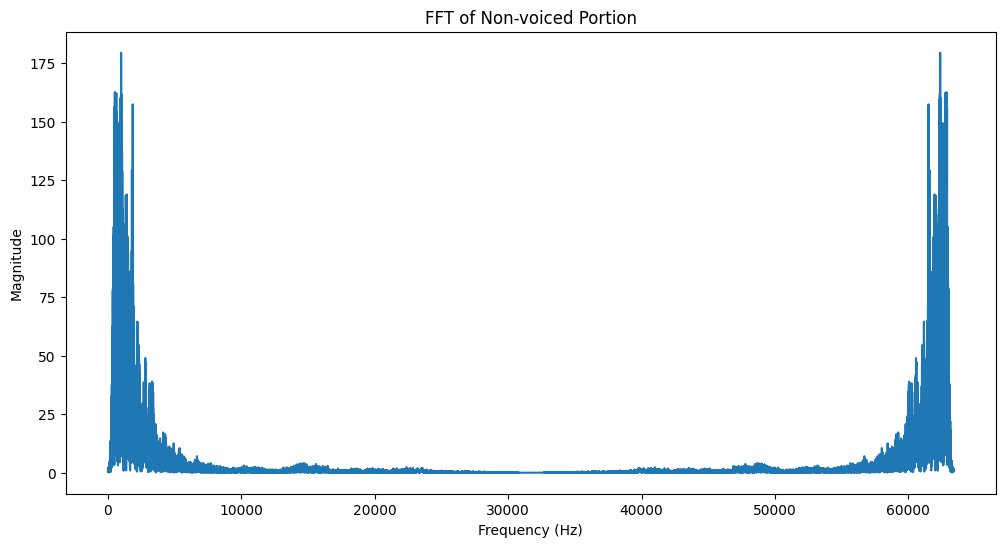

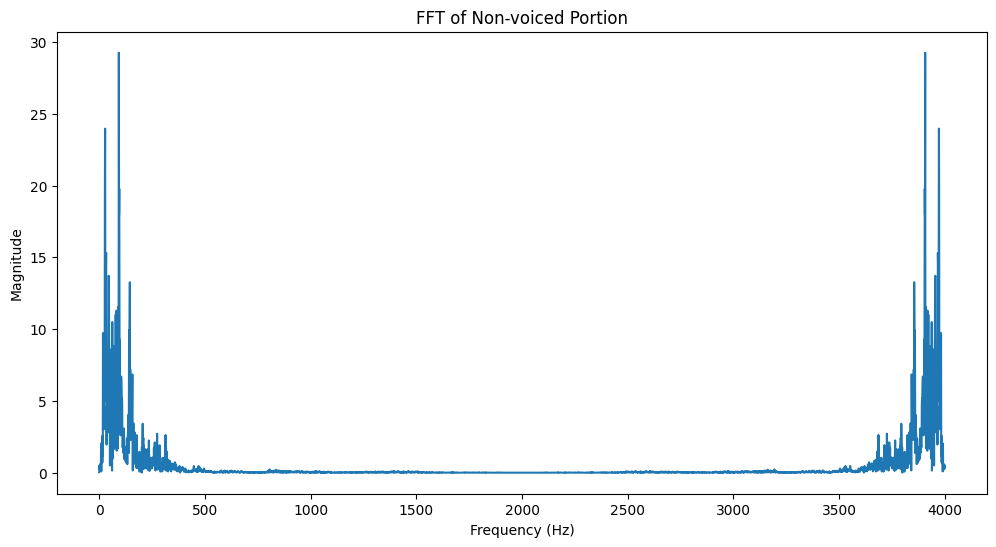

/usr/local/lib/python3.10/dist-packages/matplotlib/axes/_axes.py:7773: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


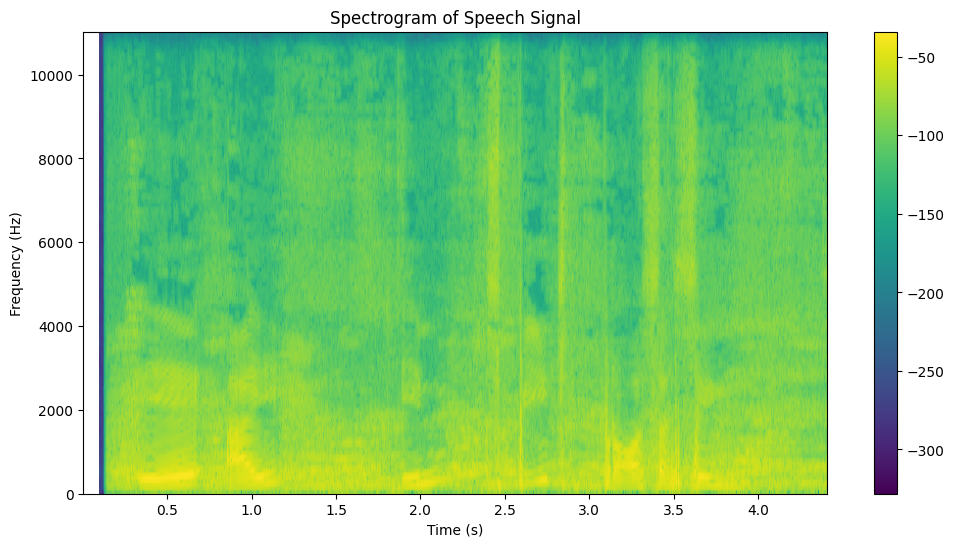

In [2]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
import IPython.display as ipd
import scipy.signal as signal
import scipy.io.wavfile as wavfile
from glob import glob
import seaborn as sns
from scipy.signal import spectrogram


# In[11]:


y, sr = librosa.load('voice1.wav')
librosa.display.waveshow(y)


# In[13]:


a = glob('voice1.wav')
ipd.Audio(a[0])


# ## A1. Take a portion of your recorded signal which represents a vowel sound. Perform FFT on the signal snippet and observe the amplitude spectrum. Repeat the same for a few vowel sounds.

# In[12]:



sample_rate, data = wavfile.read('voice1.wav')

start_time = int(0.5 * sample_rate)
end_time = int(1.0 * sample_rate)

vowel_sound = data[start_time:end_time]
fft_result = np.fft.fft(vowel_sound)
frequency_bins = np.fft.fftfreq(len(fft_result), 1/sample_rate)
amplitude_spectrum = np.abs(fft_result)

plt.figure(figsize=(10, 6))
plt.plot(frequency_bins[:len(frequency_bins)//2], amplitude_spectrum[:len(frequency_bins)//2])
plt.title('Amplitude Spectrum of Vowel Sound')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


# In[15]:


def plot_fft_and_play(signal, title):
    # Plot FFT
    fft_result = np.fft.fft(signal)
    plt.figure(figsize=(12, 6))
    plt.plot(np.abs(fft_result))
    plt.title(title)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.show()

    # Play audio
    ipd.display(ipd.Audio(signal, rate=sr))


# In[17]:


# Vowel sounds
vowel_a = y[10000:16000]
plot_fft_and_play(vowel_a, "FFT of the Vowel 'A'")

vowel_i = y[12700:19000]
plot_fft_and_play(vowel_i, "FFT of the Vowel 'I'")

vowel_e = y[19000:26000]
plot_fft_and_play(vowel_e, "FFT of the Vowel 'E'")

vowel_o = y[24000:31000]
plot_fft_and_play(vowel_o, "FFT of the Vowel 'O'")


# ## A2. Repeat the A1 for a consonant sound. Perform the same for a few consonant sounds.

# In[18]:



# Consonant sounds
consonant_p = y[18000:26000]
plot_fft_and_play(consonant_p, "FFT of the Consonant 'P'")

consonant_s = y[16000:22000]
plot_fft_and_play(consonant_s, "FFT of the Consonant 'S'")

consonant_h = y[24000:31000]
plot_fft_and_play(consonant_h, "FFT of the Consonant 'H'")

consonant_c = y[18000:25000]
plot_fft_and_play(consonant_c, "FFT of the Consonant 'C'")

consonant_n = y[16000:23000]
plot_fft_and_play(consonant_n, "FFT of the Consonant 'N'")


# ## A3. Repeat A2 for few slices of silence & non-voiced portions of the recorded speech signal.
#

# In[19]:


# Silence and non-voiced portions
silence = y[0:30000]
plot_fft_and_play(silence, "FFT of Slice of Silence")

non_voiced = y[34000:]
plot_fft_and_play(non_voiced, "FFT of Non-voiced Portion")

non_voiced2 = y[30000:34000]
plot_fft_and_play(non_voiced2, "FFT of Non-voiced Portion")


# ## A4. Now you have acquainted yourself with spectral amplitudes of various consonants and vowelbased phonemes. Generate the spectrogram of the signal and observe the change points of the signals with associated speech segments. Observe to identify the consonants and vowels from the spectrogram.

# In[20]:


plt.figure(figsize=(12, 6))
plt.specgram(y, Fs=sr)
plt.title("Spectrogram of Speech Signal")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.colorbar()
plt.show()

# Play entire audio
ipd.display(ipd.Audio(y, rate=sr))

In [ ]:
_